In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")


Categorical Features

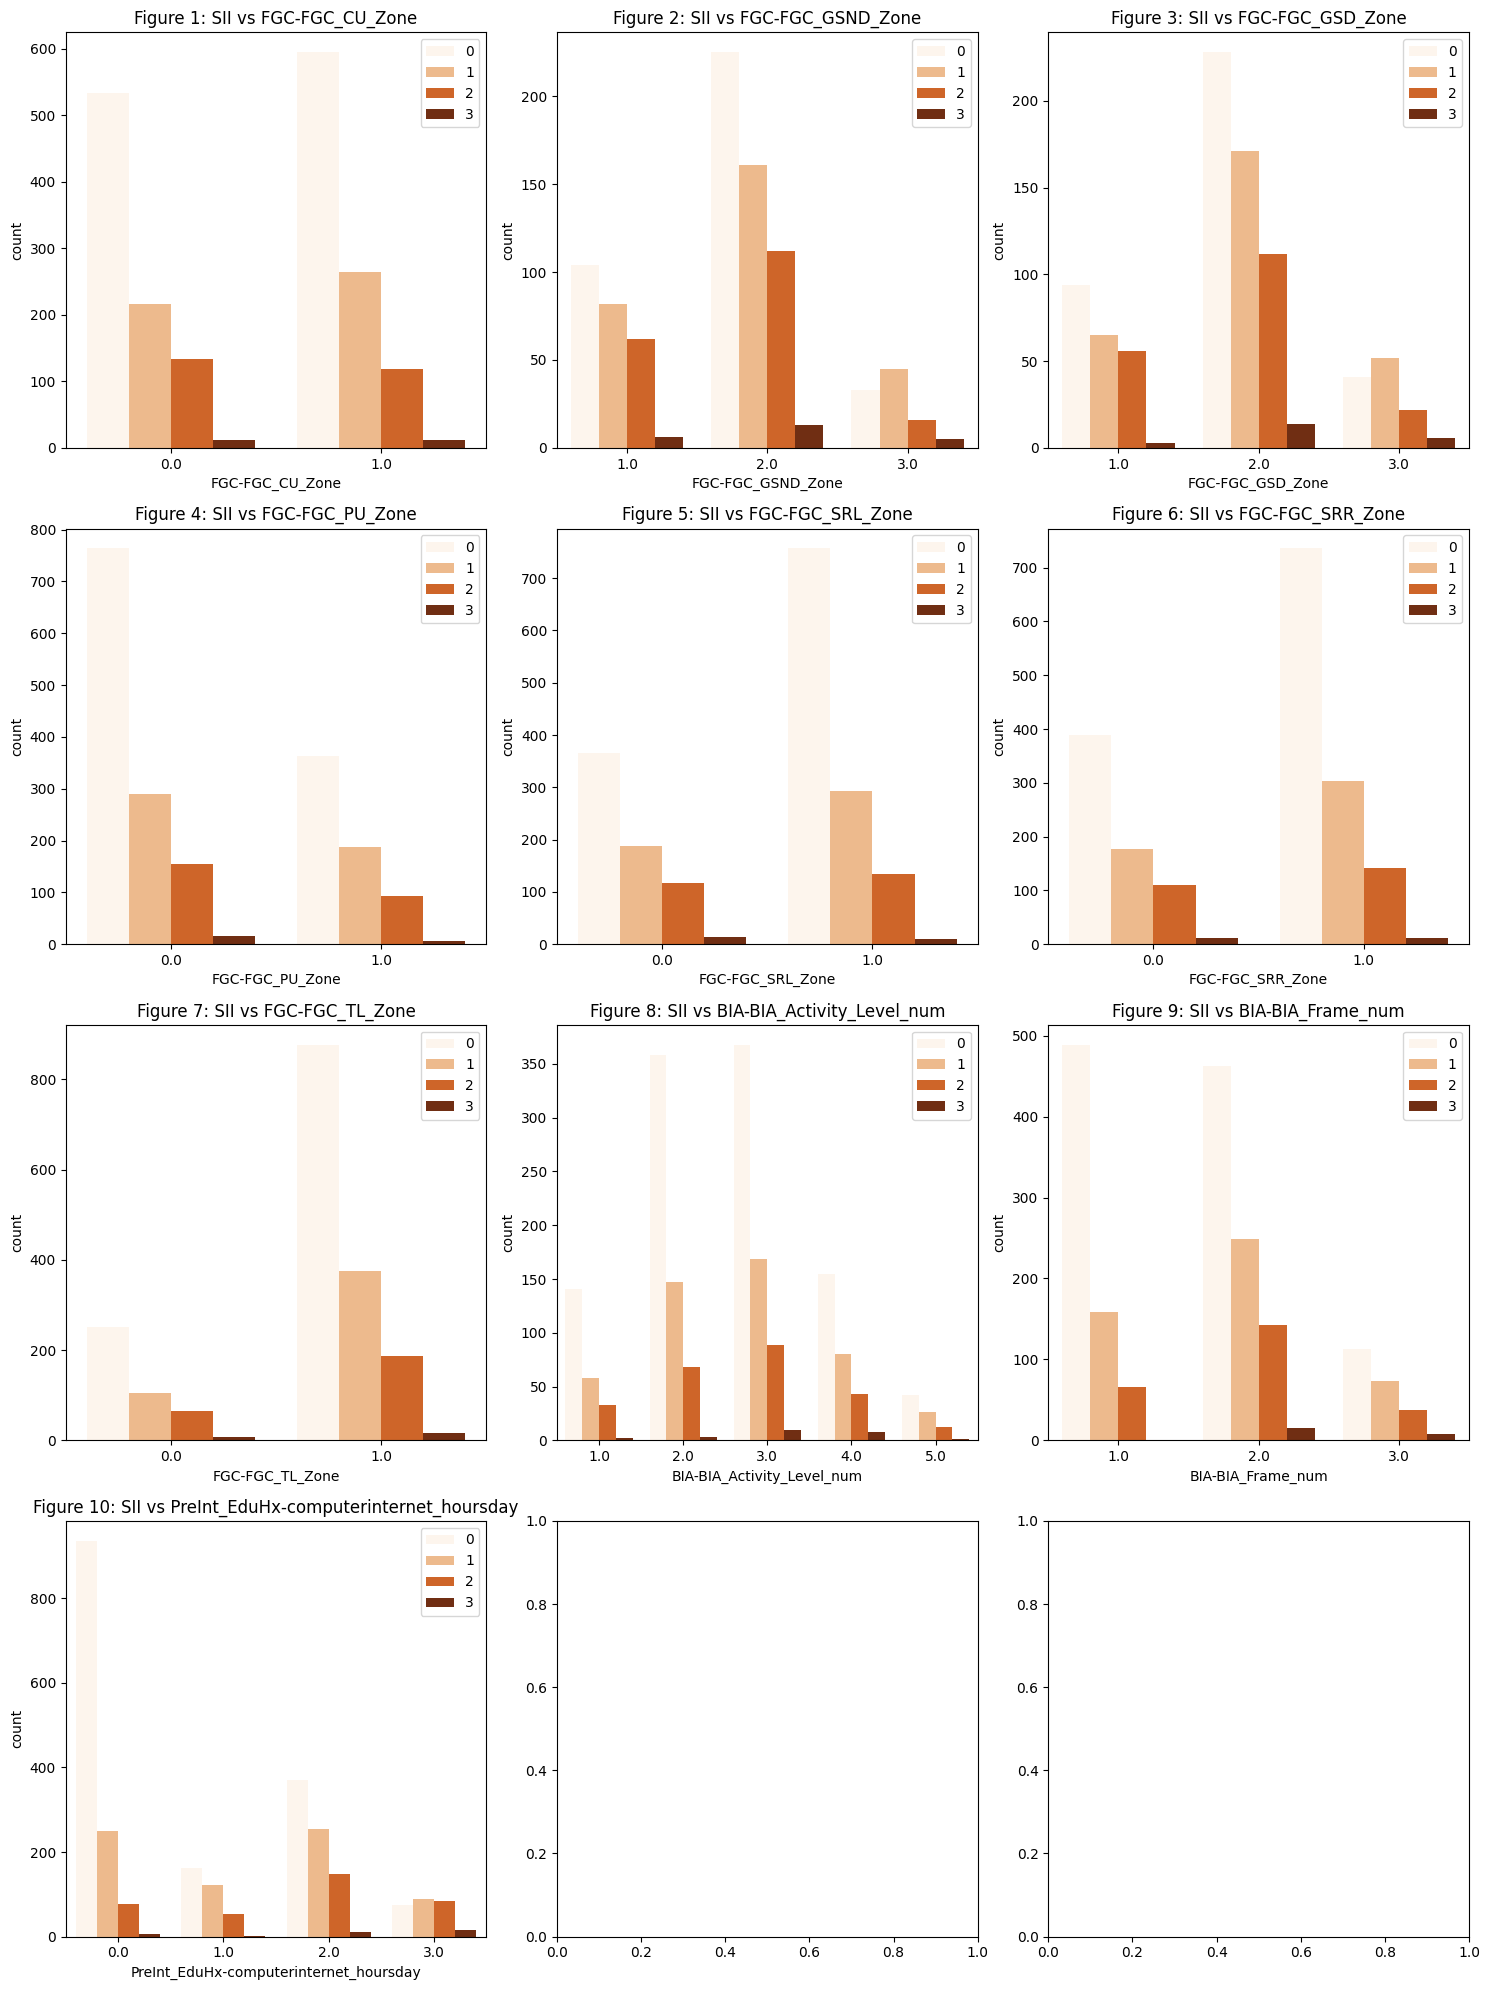

In [14]:
cols = ["FGC-FGC_CU_Zone","FGC-FGC_GSND_Zone","FGC-FGC_GSD_Zone","FGC-FGC_PU_Zone","FGC-FGC_SRL_Zone","FGC-FGC_SRR_Zone","FGC-FGC_TL_Zone",
            "BIA-BIA_Activity_Level_num","BIA-BIA_Frame_num","PreInt_EduHx-computerinternet_hoursday"]
n_rows = 4;
n_cols = 3;

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='sii', palette="Oranges", ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: SII vs {cols[i]}")
            ax_i.legend(loc="upper right", labels = ["0","1","2","3"])

plt.tight_layout()

Numberical Features

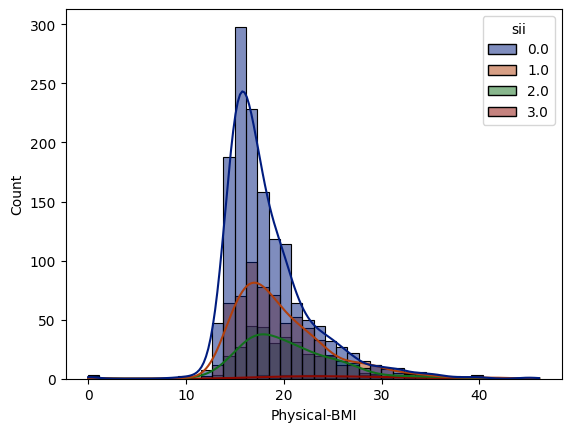

In [6]:
sns.histplot(data=train_df, x="Physical-BMI", hue="sii" ,bins = 40, kde = True, palette = "dark");

In [7]:
train_df["Physical-Height"].describe()

count    3027.000000
mean       55.946713
std         7.473764
min        33.000000
25%        50.000000
50%        55.000000
75%        62.000000
max        78.500000
Name: Physical-Height, dtype: float64

<Axes: xlabel='FGC-FGC_PU', ylabel='count'>

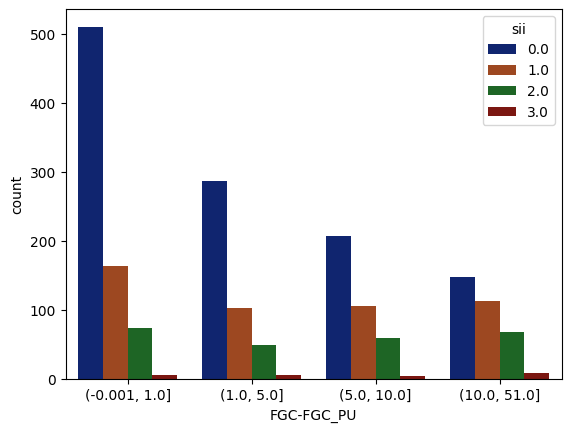

In [13]:
quartile_data = pd.qcut(train_df["FGC-FGC_PU"], 5, duplicates='drop')
sns.countplot(x=quartile_data, hue=train_df["sii"], palette='dark')

In [13]:
if not os.path.exists('plots'):
    os.makedirs('plots')

# Danh sách các cột cần vẽ biểu đồ
columns = [
    "Basic_Demos-Age",
    "CGAS-CGAS_Score",
    "Physical-BMI",
    "Physical-Height",
    "Physical-Weight",
    "Physical-Waist_Circumference",
    "Physical-Diastolic_BP",
    "Physical-HeartRate",
    "Physical-Systolic_BP",
    "Fitness_Endurance-Max_Stage",
    "Fitness_Endurance-Time_Mins",
    "Fitness_Endurance-Time_Sec",
    "FGC-FGC_CU",
    "FGC-FGC_GSND",
    "FGC-FGC_GSD",
    "FGC-FGC_PU",
    "FGC-FGC_SRL",
    "FGC-FGC_SRR",
    "FGC-FGC_TL",
    "BIA-BIA_BMC",
    "BIA-BIA_BMI",
    "BIA-BIA_BMR",
    "BIA-BIA_DEE",
    "BIA-BIA_ECW",
    "BIA-BIA_FFM",
    "BIA-BIA_FFMI",
    "BIA-BIA_FMI",
    "BIA-BIA_Fat",
    "BIA-BIA_ICW",
    "BIA-BIA_LDM",
    "BIA-BIA_LST",
    "BIA-BIA_SMM",
    "BIA-BIA_TBW",
    "PAQ_A-PAQ_A_Total",
    "PAQ_C-PAQ_C_Total",
    "PCIAT-PCIAT_Total",
    "SDS-SDS_Total_Raw",
    "SDS-SDS_Total_T"
];
# Vòng lặp qua từng cột để tạo biểu đồ
for column in columns:
    try:
        # Kiểm tra xem cột có phải là số không
        if pd.api.types.is_numeric_dtype(train_df[column]):
            # Phân chia dữ liệu thành 4 quartile
            quartile_data = pd.qcut(train_df[column], 4, duplicates='drop')
            
            plt.figure(figsize=(10, 6))
            sns.countplot(x=quartile_data, hue=train_df["sii"], palette='dark')
            plt.xlabel(f'Quartiles of {column}')
            plt.ylabel('Count')
            plt.title(f'Count Plot of {column} Quartiles by SII')
            plt.legend(title='SII')
            plt.xticks(rotation=45)
            plt.tight_layout()
            
            # Lưu biểu đồ vào thư mục 'plots'
            plt.savefig(f'plots/{column}_countplot.png')
            plt.close()
            
            print(f"Đã lưu biểu đồ cho cột: {column}")
        else:
            print(f"Cột '{column}' không phải là số. Bỏ qua việc tạo biểu đồ.")
    except ValueError as e:
        print(f"Không thể phân chia cột '{column}' thành quartiles: {e}")
    except Exception as e:
        print(f"Đã xảy ra lỗi với cột '{column}': {e}")

Đã lưu biểu đồ cho cột: Basic_Demos-Age
Đã lưu biểu đồ cho cột: CGAS-CGAS_Score
Đã lưu biểu đồ cho cột: Physical-BMI
Đã lưu biểu đồ cho cột: Physical-Height
Đã lưu biểu đồ cho cột: Physical-Weight
Đã lưu biểu đồ cho cột: Physical-Waist_Circumference
Đã lưu biểu đồ cho cột: Physical-Diastolic_BP
Đã lưu biểu đồ cho cột: Physical-HeartRate
Đã lưu biểu đồ cho cột: Physical-Systolic_BP
Đã lưu biểu đồ cho cột: Fitness_Endurance-Max_Stage
Đã lưu biểu đồ cho cột: Fitness_Endurance-Time_Mins
Đã lưu biểu đồ cho cột: Fitness_Endurance-Time_Sec
Đã lưu biểu đồ cho cột: FGC-FGC_CU
Đã lưu biểu đồ cho cột: FGC-FGC_GSND
Đã lưu biểu đồ cho cột: FGC-FGC_GSD
Đã lưu biểu đồ cho cột: FGC-FGC_PU
Đã lưu biểu đồ cho cột: FGC-FGC_SRL
Đã lưu biểu đồ cho cột: FGC-FGC_SRR
Đã lưu biểu đồ cho cột: FGC-FGC_TL
Đã lưu biểu đồ cho cột: BIA-BIA_BMC
Đã lưu biểu đồ cho cột: BIA-BIA_BMI
Đã lưu biểu đồ cho cột: BIA-BIA_BMR
Đã lưu biểu đồ cho cột: BIA-BIA_DEE
Đã lưu biểu đồ cho cột: BIA-BIA_ECW
Đã lưu biểu đồ cho cột: BIA-BIA